In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importing and Pre-processing

In [105]:
houses = pd.read_csv("house_sales.csv")
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


To import the dataset we used the Pandas function pd.read_csv() since our dataset is made up of comma-separated values

This dataset contains details of house sales in neighborhoods of King County, Washington.   
It includes data for houses sold between May 2014 and May 2015.    

Origin: Kaggle  
File Type: CSV  
File Size: 2.5 MB  
Modeling Problem: Regression  
Missing Values: Yes  

Attributes:  
id - a numerical identity field for each house sale  
date - date when the house is sold  
price - house sale price amount in US dollars (dependent variable)  
bedrooms - number of bedrooms in the house  
bathrooms - number of bathrooms in the house  
sqft_living - living area in square feet  
sqft_lot - total lot area in square feet  
floors - number of floors in the house  
waterfront - binary field, 1 if the house has a waterfront, 0 for no waterfront  
view - binary field, 1 if the house has a view, 0 for no view  
condition - a number denoting the condition of the house  
grade - a number denoting the grade of the house  
sqft_basement - area in square feet if the house has a basement  
yr_built - in which year is the house built  
yr_renovated - year when a house is renovated, 0 if not renovated  
zipcode - house location zipcode in the county  
lat - latitude cooridnate   
long - longitude coordinate  


---

To find the dimensions of the dataframe we use .shape

In [106]:
# number of rows of dataframe
print('Number of Rows:', houses.shape[0])

#number of columns of dataframe
print('Number of Columns:', houses.shape[1])

Number of Rows: 21613
Number of Columns: 21


Next we can use .dtypes to find the data types

In [107]:
print(houses.dtypes)

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


The dataset has 12 intger variables, 8 float variables, and 1 object variable

In [108]:
# Loook for missing values by finding the sum of missing values in each row
print(houses.isnull().sum())

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


Looks like there are only 4 variables with missing values. These variables are bedrooms, bathrooms, sqft_living, and sqft_lot which are all floats. To figure out the best way to handle the missing data let's look at each variable more in depth.

In [109]:
houses['bedrooms'].unique() #used to check the unique values of bedrooms

array([ 3.,  2.,  4.,  5., nan,  1.,  6.,  7.,  0.,  8.,  9., 10., 33.])

In [110]:
houses['bedrooms'].value_counts()

3.0     9286
4.0     6519
2.0     2617
5.0     1539
6.0      263
1.0      189
7.0       34
8.0       12
0.0       11
9.0        5
10.0       3
33.0       1
Name: bedrooms, dtype: int64

Looks like there are a couple of outliers and we should automatically remove 33 since it is most likely a data error as 33 bedrooms is a lot. I will keep the values in range of 0-10 since they are valid for number of bedrooms. 0 could be studio apartments and values 8-10 could be mansions. Although these values are less common, they are still valid and can provide information about the dataset

In [111]:
houses = houses[houses['bedrooms'] <=10]

In [112]:
houses['bedrooms'].describe()

count    20478.000000
mean         3.371374
std          0.907412
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: bedrooms, dtype: float64

<AxesSubplot:ylabel='bedrooms'>

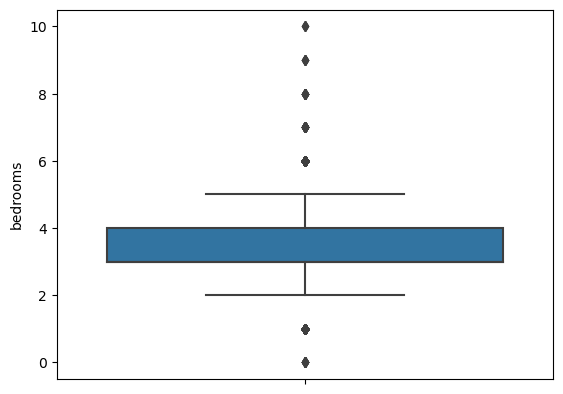

In [113]:
sns.boxplot(data= houses, y="bedrooms")

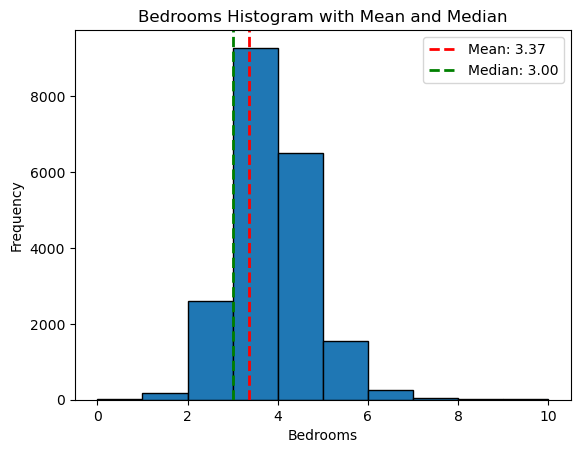

In [114]:
bedrooms_mean = houses['bedrooms'].mean()
bedrooms_median = houses['bedrooms'].median()

plt.hist(houses['bedrooms'], bins = 10, edgecolor='black')
plt.axvline(bedrooms_mean, color='red', linestyle='dashed', linewidth =2, label =f'Mean: {bedrooms_mean:.2f}')
plt.axvline(bedrooms_median, color='green', linestyle='dashed', linewidth =2, label =f'Median: {bedrooms_median:.2f}')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Bedrooms Histogram with Mean and Median')
plt.legend()
plt.show()

Since the data is skewed, I will use the median to fill the missing values

In [115]:
houses['bedrooms'] = houses['bedrooms'].fillna(houses['bedrooms'].median())

C:\Users\jordy\AppData\Local\Temp\ipykernel_35512\3661224818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['bedrooms'] = houses['bedrooms'].fillna(houses['bedrooms'].median())


In [116]:
houses['bathrooms'].unique() #used to check the unique values of bathrooms

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75,  nan, 3.25,
       4.  , 3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 5.25, 6.  , 1.25,
       0.5 , 5.5 , 5.75, 8.  , 6.75, 7.5 , 7.75, 6.25, 6.5 ])

In [117]:
houses['bathrooms'].value_counts()

2.50    4853
1.00    3485
1.75    2751
2.25    1854
2.00    1719
1.50    1304
2.75    1067
3.00     683
3.50     640
3.25     523
3.75     143
4.00     123
4.50      90
4.25      74
0.75      65
4.75      23
5.00      19
5.25      10
5.50      10
1.25       7
0.00       6
6.00       5
0.50       4
5.75       3
6.25       2
6.50       2
8.00       1
6.75       1
7.50       1
7.75       1
Name: bathrooms, dtype: int64

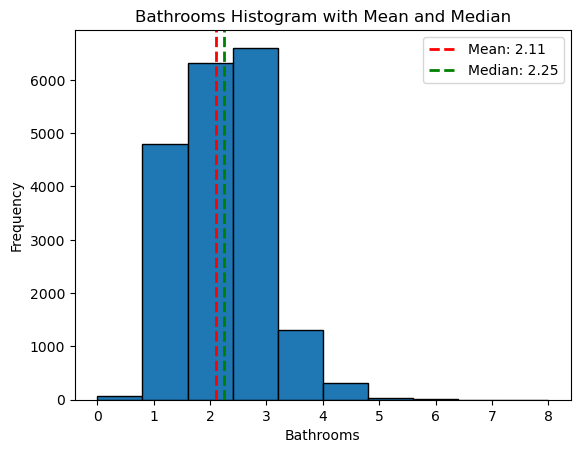

In [118]:
bathrooms_mean = houses['bathrooms'].mean()
bathrooms_median = houses['bathrooms'].median()

plt.hist(houses['bathrooms'], bins = 10, edgecolor='black')
plt.axvline(bathrooms_mean, color='red', linestyle='dashed', linewidth =2, label =f'Mean: {bathrooms_mean:.2f}')
plt.axvline(bathrooms_median, color='green', linestyle='dashed', linewidth =2, label =f'Median: {bathrooms_median:.2f}')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.title('Bathrooms Histogram with Mean and Median')
plt.legend()
plt.show()

In [119]:
# fill na values with median due to slightly skewed distribution
houses['bathrooms'] = houses['bathrooms'].fillna(houses['bathrooms'].median())

C:\Users\jordy\AppData\Local\Temp\ipykernel_35512\469909836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['bathrooms'] = houses['bathrooms'].fillna(houses['bathrooms'].median())


In [120]:
houses['sqft_living'].describe()

count    19447.000000
mean      2083.100941
std        918.871323
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      12050.000000
Name: sqft_living, dtype: float64

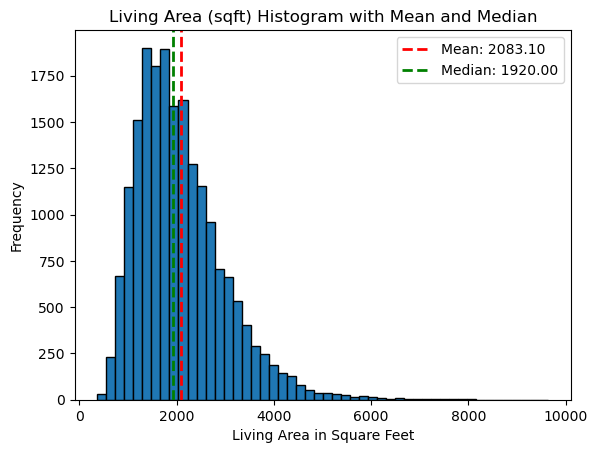

In [121]:
sqft_living_mean = houses['sqft_living'].mean()
sqft_living_median = houses['sqft_living'].median()

plt.hist(houses[houses['sqft_living']<10000]['sqft_living'], bins = 50, edgecolor='black')
plt.axvline(sqft_living_mean, color='red', linestyle='dashed', linewidth =2, label =f'Mean: {sqft_living_mean:.2f}')
plt.axvline(sqft_living_median, color='green', linestyle='dashed', linewidth =2, label =f'Median: {sqft_living_median:.2f}')
plt.xlabel('Living Area in Square Feet')
plt.ylabel('Frequency')
plt.title('Living Area (sqft) Histogram with Mean and Median')
plt.legend()
plt.show()

In [122]:
# fill na values with median due to slightly skewed distribution
houses['sqft_living'] = houses['sqft_living'].fillna(houses['sqft_living'].median())

C:\Users\jordy\AppData\Local\Temp\ipykernel_35512\1968678314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['sqft_living'] = houses['sqft_living'].fillna(houses['sqft_living'].median())


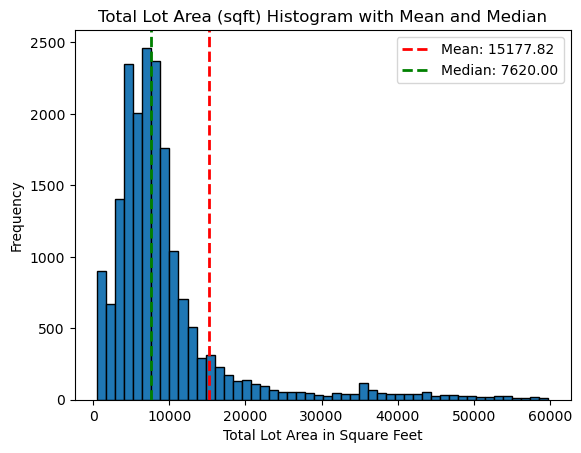

In [123]:
sqft_lot_mean = houses['sqft_lot'].mean()
sqft_lot_median = houses['sqft_lot'].median()

plt.hist(houses[houses['sqft_lot'] <60000]['sqft_lot'], bins = 50, edgecolor='black')
plt.axvline(sqft_lot_mean, color='red', linestyle='dashed', linewidth =2, label =f'Mean: {sqft_lot_mean:.2f}')
plt.axvline(sqft_lot_median, color='green', linestyle='dashed', linewidth =2, label =f'Median: {sqft_lot_median:.2f}')
plt.xlabel('Total Lot Area in Square Feet')
plt.ylabel('Frequency')
plt.title('Total Lot Area (sqft) Histogram with Mean and Median')
plt.legend()
plt.show()

In [124]:
# fill na values with median due to slightly skewed distribution
houses['sqft_lot'] = houses['sqft_lot'].fillna(houses['sqft_lot'].median())

C:\Users\jordy\AppData\Local\Temp\ipykernel_35512\3571160870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['sqft_lot'] = houses['sqft_lot'].fillna(houses['sqft_lot'].median())


Now all of the missing values are handled!

In [125]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.047800e+04,2.047800e+04,20478.000000,20478.000000,20478.000000,2.047800e+04,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000
mean,4.589612e+09,5.403971e+05,3.371374,2.119946,2074.889345,1.481613e+04,1.493896,0.007374,0.234056,3.410685,7.657291,1790.594931,290.786112,1970.918889,84.305792,98077.921281,47.560079,-122.213882,1986.781570,12739.683319
std,2.878642e+09,3.681934e+05,0.907412,0.750061,896.150333,4.085610e+04,0.538376,0.085556,0.765048,0.651524,1.176076,829.952522,441.685369,29.385531,401.463164,53.439450,0.138357,0.140836,685.743423,27256.576211
min,1.000102e+06,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125059e+09,3.220500e+05,3.000000,1.750000,1450.000000,5.150000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471300,-122.328000,1490.000000,5100.000000
50%,3.904990e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571750,-122.230000,1840.000000,7620.000000
75%,7.333775e+09,6.450000e+05,4.000000,2.500000,2510.000000,1.041550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2219.250000,560.000000,1997.000000,0.000000,98118.000000,47.677900,-122.125000,2360.000000,10080.000000
max,9.895000e+09,7.700000e+06,10.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


I will first remove the id column since it has no importance to the dataset and just adds extra noise.

In [126]:
houses = houses.drop(columns=['id'])

Then I will extract the year and month from the date variable and delete the date variable so that it will be more helpful to look at year and month separately rather than the raw date

In [127]:
houses['year_sold']=pd.to_datetime(houses['date']).dt.year
houses['month_sold']=pd.to_datetime(houses['date']).dt.month
houses = houses.drop(columns=['date'])

In [128]:
# need to change zipcode to categorical so it is not treated as numeric since it is a label not a quantity
houses['zipcode'] = houses['zipcode'].astype('category')

In [129]:
# change waterfront and view so values are Yes/No
houses['waterfront'] = houses['waterfront'].map({0: 'No', 1:'Yes'})
houses['view'] = houses['view'].map({0: 'No', 1:'Yes'})

In [132]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,No,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,No,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2.0,1.00,770.0,10000.0,1.0,No,No,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,No,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,No,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
